In [1]:
import pandas as pd

In [2]:
df0 = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/relevant_data_trim_entities_0.csv",usecols=['entities', 'author_id'])
df2 = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/relevant_data_trim_entities_2.csv",usecols=['entities', 'author_id'])
df6 = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/relevant_data_trim_entities_6.csv",usecols=['entities', 'author_id'])

In [3]:
df = pd.concat([df0, df2, df6]).reset_index(drop=True)


In [9]:
df['entities'][5]

"{'hashtags': [{'text': 'TheLegendofVoxMachina', 'indices': [28, 50]}], 'symbols': [], 'user_mentions': [{'screen_name': 'TitmouseInc', 'name': 'Titmouse Animation', 'id': 17278037, 'id_str': '17278037', 'indices': [105, 117]}, {'screen_name': 'CriticalRole', 'name': 'Critical Role', 'id': 3159148494, 'id_str': '3159148494', 'indices': [124, 137]}], 'urls': [], 'media': [{'id': 1495109637846102018, 'id_str': '1495109637846102018', 'indices': [270, 293], 'media_url': 'http://pbs.twimg.com/media/FL-yS1AUcAIfiy2.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FL-yS1AUcAIfiy2.jpg', 'url': 'https://t.co/vYuI4X1SSx', 'display_url': 'pic.twitter.com/vYuI4X1SSx', 'expanded_url': 'https://twitter.com/cbtillustrates/status/1495109640459198464/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1536, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 900, 'resize': 'fit'}}}]}"

In [10]:
import ast

# Safely convert string to dictionary and extract hashtag texts
def extract_hashtags(entity_str):
    try:
        entity = ast.literal_eval(entity_str)
        hashtags = entity.get('hashtags', [])
        return [tag.get('text', '') for tag in hashtags]
    except (ValueError, SyntaxError):
        return []

# Apply to the entire column
df['hashtags'] = df['entities'].apply(extract_hashtags)


In [14]:
df['author_id'] = df['author_id'].apply(lambda x: 'u' + str(x))


In [17]:
hashtag_data = df[['author_id', 'hashtags']]

In [18]:
label_df = pd.read_csv('/Users/shantanupatankar/Desktop/Social Computing Project/Data/Raw Data/label.csv')

In [20]:
# Rename 'id' to 'author_id' in label_df
label_df_renamed = label_df.rename(columns={'id': 'author_id'})

# Perform inner join
merged_df = pd.merge(hashtag_data, label_df_renamed, on='author_id', how='inner')


In [2]:
import pandas as pd
merged_df = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/Hashtag_data_026.csv")

In [10]:
bot_hashtags = merged_df[merged_df['label'] == 'bot']

In [11]:
bot_hashtags_li = bot_hashtags['hashtags'].tolist()

In [17]:
import ast
flattened_hashtags = []
for item in bot_hashtags_li:
    hashtags = ast.literal_eval(item)  # Safely evaluate the string as a Python list
    flattened_hashtags.extend(hashtags)

In [14]:
flattened_hashtags = [hashtag for sublist in bot_hashtags_li for hashtag in list(sublist)]


In [18]:
from collections import Counter

# Assuming your list is called `word_list`
word_counts = Counter(flattened_hashtags)

# Get top 50 most common words with their frequencies
top_50 = word_counts.most_common(50)

# Display as list of (word, frequency) tuples
print(top_50)


[('', 23930), ('AI', 10933), ('NFT', 6073), ('MachineLearning', 4738), ('100DaysOfCode', 4637), ('COVID19', 4116), ('DataScience', 4107), ('Bitcoin', 3977), ('technology', 3796), ('business', 3721), ('NFTs', 3540), ('Python', 3448), ('crypto', 3330), ('Ukraine', 3112), ('cybersecurity', 3070), ('IoT', 3068), ('BigData', 2987), ('marketing', 2931), ('ArtificialIntelligence', 2613), ('tech', 2558), ('NFTCommunity', 2520), ('Crypto', 2446), ('blockchain', 2445), ('cryptocurrency', 2440), ('data', 2399), ('bitcoin', 2301), ('innovation', 2282), ('Metaverse', 2144), ('art', 2052), ('love', 1992), ('fashion', 1925), ('javascript', 1919), ('BTC', 1838), ('healthcare', 1748), ('startup', 1744), ('nft', 1741), ('health', 1716), ('DeepLearning', 1703), ('Analytics', 1697), ('ML', 1675), ('fintech', 1651), ('hiring', 1647), ('programming', 1619), ('ai', 1616), ('leadership', 1594), ('socialmedia', 1526), ('machinelearning', 1526), ('DeFi', 1477), ('Russia', 1454), ('NFTGiveaway', 1449)]


In [50]:
word_list = [i[0] for i in  top_50]

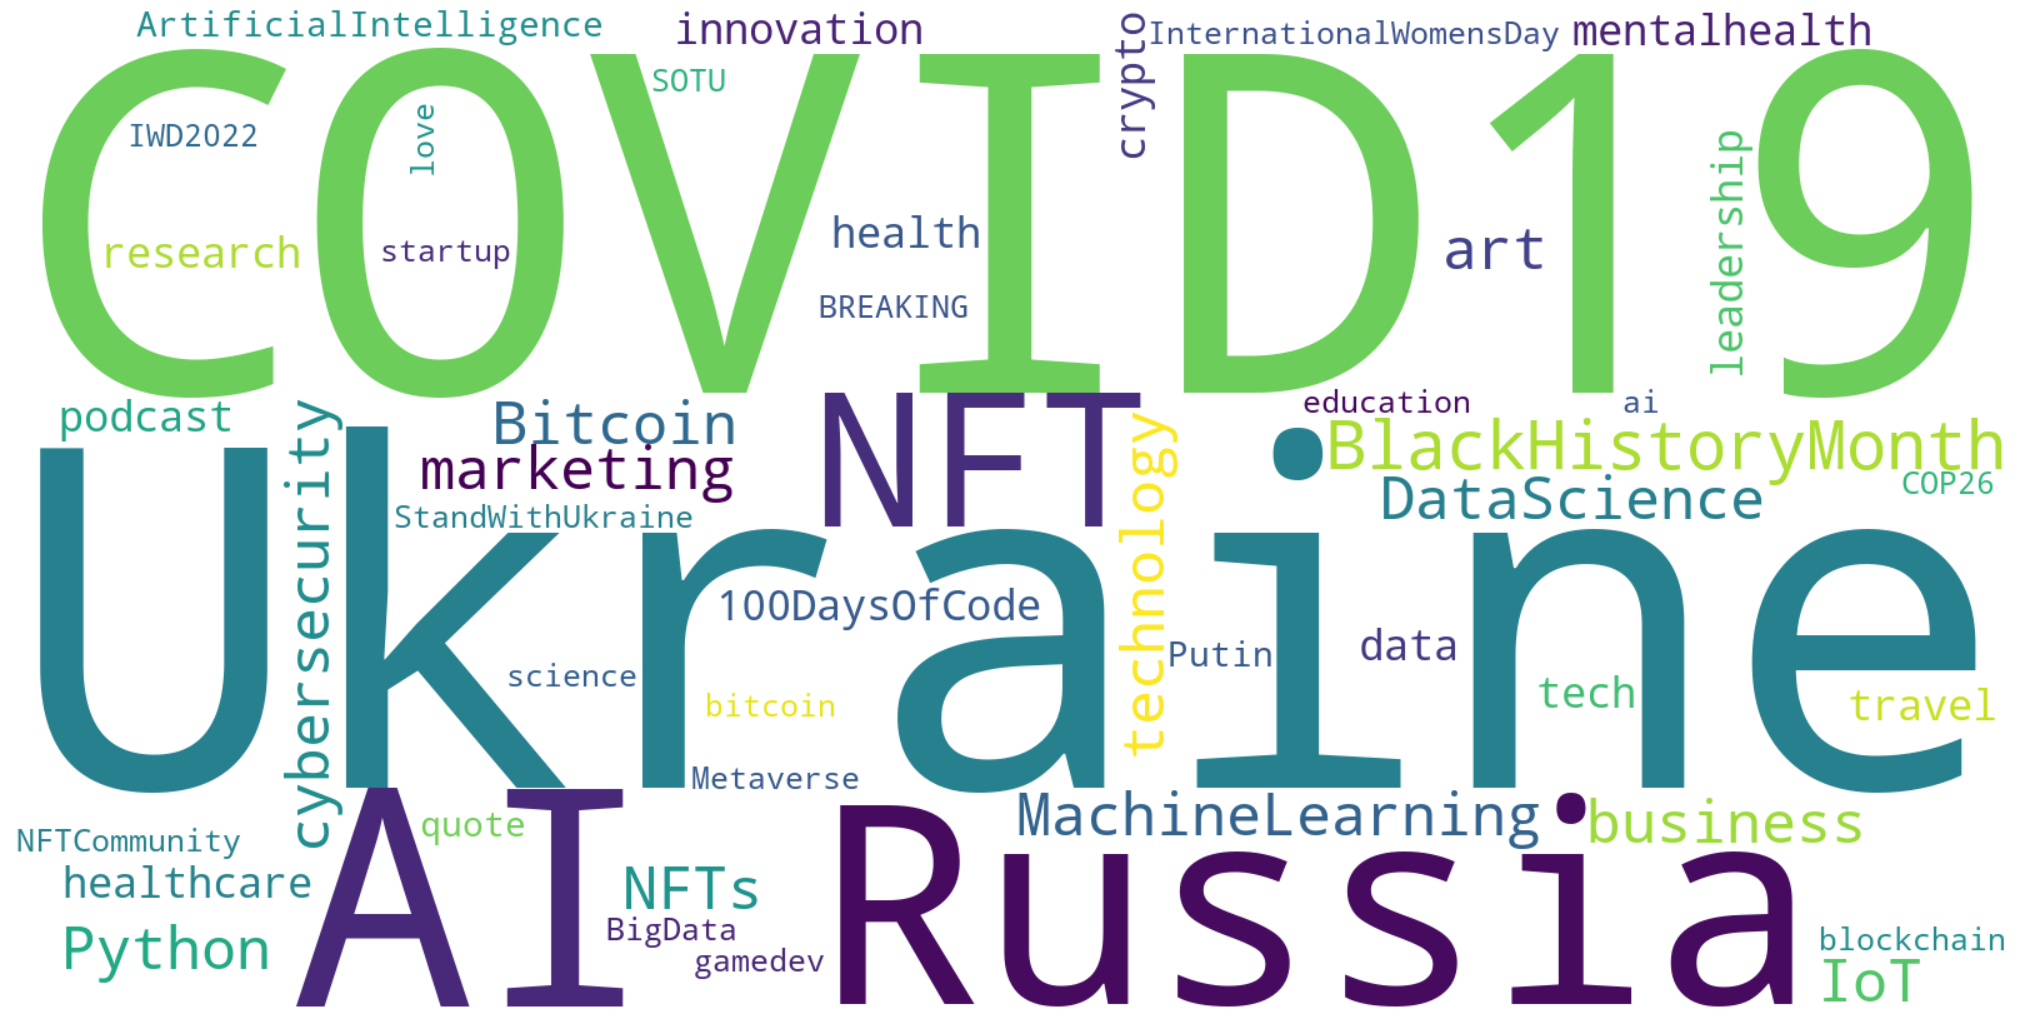

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Assuming your word list is in `word_list`
word_freq = Counter(word_list)

# Generate word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(word_freq)

# Display it (optional)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud of Most Frequent Words", fontsize=24)
plt.tight_layout(pad=0)

# Save as high-resolution image
wordcloud.to_file("wordcloud_high_res.png")


In [36]:
!pip3 install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [61]:
df_t0 = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/Tweet_Numerical_0.csv")
df_t2 = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/Tweet_Numerical_2.csv")
df_t6 = pd.read_csv("/Users/shantanupatankar/Desktop/Social Computing Project/Data/Clean Data/Tweet_Numerical_6.csv")

In [62]:
df = pd.concat([df_t0, df_t2, df_t6]).reset_index(drop=True)

In [63]:
columns_to_multiply = [
    'avg_retweet_count', 'avg_reply_count', 'avg_like_count',
    'avg_quote_count', 'avg_hashtag_count', 'avg_symbols_count',
    'avg_user_mentions_count', 'avg_media_count', 'avg_word_count'
]

# Multiply each specified column by 'tweet_count'
for col in columns_to_multiply:
    df[col] = df[col] * df['tweet_count']

In [70]:
df_bot = df[df['label'] == 'bot'][columns_to_multiply + ['tweet_count']].reset_index(drop = True)
df_human = df[df['label'] == 'human'][columns_to_multiply+ ['tweet_count']].reset_index(drop = True)

In [75]:
bot_sum = df_bot.sum(axis=0)
human_sum = df_human.sum(axis=0)

In [78]:
bot_stats = bot_sum/bot_sum['tweet_count']

In [79]:
human_stats = human_sum/human_sum['tweet_count']

In [81]:
df_stats = pd.DataFrame({
    'bot_stats': bot_stats,
    'human_stats': human_stats
})

# Calculate the percent difference
df_stats['percent_diff'] = abs(df_stats['bot_stats'] - df_stats['human_stats']) / df_stats['human_stats'] * 100

# Display the result with bot, human, and percent difference
print(df_stats[['bot_stats', 'human_stats', 'percent_diff']])


                          bot_stats  human_stats  percent_diff
avg_retweet_count        925.714055   722.644208     28.100944
avg_reply_count            1.619852     9.796956     83.465759
avg_like_count            30.390882   201.149324     84.891382
avg_quote_count            1.306008     9.117170     85.675294
avg_hashtag_count          0.262072     0.167512     56.449817
avg_symbols_count          0.005860     0.002184    168.323699
avg_user_mentions_count    0.388752     0.382457      1.646035
avg_media_count            0.063543     0.063079      0.736122
avg_word_count            20.464441    20.145957      1.580883
tweet_count                1.000000     1.000000      0.000000


In [83]:
from tabulate import tabulate


In [ ]:
print(tabulate(df_stats[['bot_stats', 'human_stats', 'percent_diff']], headers='keys', tablefmt='pretty'))


+-------------------------+----------------------+----------------------+--------------------+
|                         |      bot_stats       |     human_stats      |    percent_diff    |
+-------------------------+----------------------+----------------------+--------------------+
|    avg_retweet_count    |  925.7140554668022   |  722.6442082658766   | 28.10094440364098  |
|     avg_reply_count     |  1.619852349848939   |  9.796956369742073   |  83.4657592754842  |
|     avg_like_count      |  30.39088226626906   |  201.14932407681317  | 84.89138235698786  |
|     avg_quote_count     |   1.30600787653864   |  9.117170277358277   | 85.67529357456446  |
|    avg_hashtag_count    | 0.26207244782757727  |  0.1675121473427132  | 56.449816914711924 |
|    avg_symbols_count    | 0.005860153694832496 | 0.002183986626321017 | 168.32369869883678 |
| avg_user_mentions_count |  0.3887524191307178  |  0.3824570434757009  | 1.646034701781309  |
|     avg_media_count     | 0.06354296616600004  |

In [ ]:
avg_retweet_count

In [ ]:
avg_reply_count, avg_like_count, avg_word_count